<a href="https://colab.research.google.com/github/Ambaright/ST-554-Project1/blob/main/Task1/ST554_Project1_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Task 1 - Gradient Descent Algorithms
##Introduction
The increasing incidence of respiratory illness and the known carcinogenic risks associated with prolonged exposure to pollutants like benzene (C6H6(GT)) have made precise urban air quality monitoring a critical priority for public health and municipal traffic management. Currently, urban monitoring relies on sparse networks of fixed stations equipped with high-precision industrial spectrometers; however, the high cost and significant size of these instruments prevent the deployment of a monitoring mesh dense enough to capture the complex, turbulent diffusion of gases in a city environment. To address this gap, research has shifted toward low-cost gas multi-sensor devices, often termed "electronic noses," which utilize solid-state sensors to provide a more granular view of urban pollution.

The provided report examines data from a 13-month measurement campaign (March 2004 to April 2005) conducted along a high-traffic road in an Italian city. The study’s primary objective was to evaluate the feasibility of using these low-cost devices to "densify" existing monitoring networks by comparing their readings against "Ground Truth" (GT) reference data provided by a conventional monitoring station. The dataset includes hourly mean concentrations for several "true" pollutants - CO, NMHC, C6H6, NOx, and NO2 - recorded alongside the responses of five metal oxide chemoresistive sensors (targeted at CO, NMHC, NOx, NO2, and O3) and two sensors for weather-related variables, specifically temperature (T), relative humidity (RH), and absolute humidity (AH).

A central focus of this analysis is the estimation of C6H6(GT) (benzene). Notably, the multi-sensor device used in the study did not include a sensor specifically targeted at benzene. Instead, the study aimed to reconstruct benzene levels by employing artificial neural networks to exploit the significant linear correlations that exist between different urban pollutants. For instance, a very strong correlation coefficient of 0.98 was observed between benzene and Non-Metanic Hydrocarbons (NMHC).

Furthermore, the study investigates the critical role of atmospheric dynamics, as the stability and selectivity of solid-state sensors are heavily influenced by seasonal changes and weather variables. Earlier findings suggest that sensor performance can be impacted by rapid shifts in humidity and low temperatures, which may necessitate periodic re-calibration to account for sensor drift and changing gas mixture ratios in the winter.

In this study, data from environmental sensors is utilized to model the level of benzene (C6H6) in the atmosphere based on the readingns of other atomospheric conditions. In order to find the ideal parameters by which to model and preidict benzene levels through other environmental factors, gradient descent algorithms can be utilized. Gradient descent algorithms are a first-order iterative optimization technique used to find a local minimum of a differentiable function. In the realm of modeling data and fitting linear relationships between C6H6 and other environmental factors, gradient descent is a fundamental method of model training wherein the loss function is minimized, thereby reducing the error between the models predictions and the observed data.

Two gradient descent approaches are taken in this study. The grid search algorithm is known as a brute force method in which generated predicted values or generated intercept and slope values are compared to the observed values to determine either the ideal predicted value or intercept and slope. In the gradient descent method, the derivative of the function is taken to determine the slope and therefore the direction of the minimum of the function. Small steps are then taken in this direction unitl the loss function is minimized to determine the ideal predicted values or intercept and slope of the linear model.

## Reading in and Cleaning the Data
Before coding our gradient descent algorithms, we must first read in our dataset and ensure it is in a useable format. The dataset used for this study is made available by the University of California, Irvine. From the total dataset, a pandas dataframe of the important information is obtained and stored as `air_quality_df`.  

In [2]:
#install ucimlrepo and import other neceassry modules
!pip install ucimlrepo
import pandas as pd
import ucimlrepo as uci
import numpy as np

By calling the `.head()` method on our dataframe, we see that there are several factors being measured such as gold standard measurements for benzene (C6H6) which is the variable we would like to preduct, along with gold standard measurements for carbon monoxide (CO) and measurements obtained from the sensors.

In [3]:
#extract important data from Air Quality dataset
air_quality = uci.fetch_ucirepo(id=360)
air_quality_df = air_quality['data']['original']
air_quality_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


The `.info()` and `.describe()` functions tell us about how the data in each column is stores and what the spread of the data is. This is useful when determining values in our grid search and gradient descent algorithms.

In [ ]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [20]:
air_quality_df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000
mean,2.129711,1110.580746,-150.224401,10.275735,947.198121,226.081563,826.920071,96.650327,1444.752723,1043.512936,17.770425,49.060076,0.989453
std,1.436472,218.681331,153.788325,7.441068,265.471608,227.144019,256.648430,85.089998,350.344170,405.569613,8.862688,17.451563,0.399889
min,0.100000,647.000000,-200.000000,0.200000,387.000000,-200.000000,322.000000,-200.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,946.000000,-200.000000,4.600000,743.000000,90.000000,649.000000,73.000000,1203.000000,744.750000,11.200000,35.400000,0.698100
50%,1.800000,1075.000000,-200.000000,8.500000,919.000000,176.000000,795.000000,107.000000,1447.000000,990.000000,16.900000,49.300000,0.959700
75%,2.800000,1246.000000,-200.000000,14.300000,1125.250000,320.000000,960.000000,139.000000,1673.000000,1305.000000,23.800000,62.500000,1.258600
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.180600


In the following code, observations in which either benzene or carbon monoxide gold standard readings are mssing (i.e. = -200) are removed. Upon removing the records and then running the describe function, you can see that the minimum values for these columns are no longer -200. The `.reset_index` method is used to reset the incidies of the cleaned dataframe since some records have been removed.

In [4]:
air_quality_df = air_quality_df[(air_quality_df['C6H6(GT)']!= -200)]
air_quality_df = air_quality_df[(air_quality_df['CO(GT)']!= -200)]
air_quality_df = air_quality_df.reset_index(drop=True)

Below, we create a boxplot for the C6H6(GT) variable to understand its distribution. Using information from this boxplot and from the `.describe()` method, we know that the first quartile and third quartiles of the C6H6(GT) variable are 4.6 and 14.3 respectively. We can use this information to generate predicted y values to test with our gradient descent algorithms.

<Axes: >

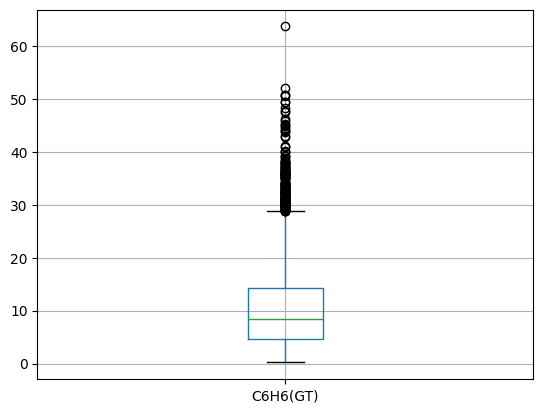

In [ ]:
air_quality_df.boxplot(column = 'C6H6(GT)')

## Grid Search Algorithm
This section contains grid search algorithms for the optimal prediction of benzene from other variables present in the dataset. The grid search will be conducted in two ways. In the Just y method, a set of generated predicted y values will be used to compare against the observed values of C6H6(GT). In the y and another numeric variable method, ideal intercept and slope values will be obtained so that benzene levels can be predicted with another numeric variable in the dataset. With this method, data obtained from sensors can be used to make predictions about the benzene levels in the atmosphere.  
### Just y
In the just y method, observed C6H6(GT) values from the dataset are utilized and compared to generated predicted values. No other variables are included. Essentially, we're seeing how far away the observed value is away from a created predicted value. These predicted values are organized in a list which forms the grid in this search method. To create the grid for this method, the `np.linspace()` function will be used to generate 100 values between the first and third quartlie of the data of the variable of interest.

The `rmse()` function takes in the record of observed y values and a certain preducted y value from the grid, and calculates the root mean squared error. This is the function we are aiming to minimize in our grid search algorithm.

In [5]:
def rmse(y_observed, c):
  #created list to hold squared error losses
  squared_errors = []
  #iterate through observations and calculate the squared error loss
  for value in y_observed:
    squared_errors.append((value-c)**2)

  return np.sqrt((1/len(y_observed))*sum(squared_errors))

The function below wraps the grid search algorithm into a single function in which a grid is created based off the first and third quartile of a data series, and then the rmse is calculated between each record of the data series and a specific predicted y value. Then, the predicted y value with the lowest rmse value is considered the ideal prediction.

In [6]:
#wrapped function that takes in a column of data and outputs the optimal value of c
def grid_search_y(data: pd.Series):
  #create a grid of c values based on the first and third quartile of the data passed in
  grid = np.linspace(data.quantile(0.25), data.quantile(0.75), 100)
  #list comprehension to loop over grid of c values and find RMSE for each values of c, y here represents a list of the observed values
  rmse_values = [rmse(data, c) for c in grid]

  #determine the predicted value that shows the lowest RMSE value
  optimal_c = grid[rmse_values.index(min(rmse_values))]
  return optimal_c


When calling our `grid_search_y` function on the C6H6 variable, we find the the ideal predicted value is 10.28.

In [7]:
grid_search_y(air_quality_df['C6H6(GT)'])

np.float64(10.282828282828284)

### Using y and another numeric variable
In the code below, a grid search will be utilized to find the optimal pair of values for the y-intercept (b0) and the slope (b1). In this approach, for each observation, the prediction is given by the linear relationship y = b0 +b1*x. As opposed to the scenario above, we know have a two dimensional grid where we want to compare each combination of b0 and b1 to find the ideal relationship between the x variable and y variable. The rmse function below follows the same principles as the previous rmse function, expect now we consider both the x and y value to see how far the value predicted by x is from the observed y value. In this grid search algorithm, we generate a grid for both the intercept (b0) and the slope (b1), and iterate through each combination of those while calculating and storing the rmse. The combination of b0 and b1 that produces the lowest rmse is considered the ideal predicting factors relating x to y.

In [8]:
def rmse_yx(y_observed : pd.Series, x_observed : pd.Series, b0, b1):
  #created list to hold squared error losses
  squared_errors = []
  #iterate through observations and calculate the squared error loss
  for x, y in zip(x_observed, y_observed):
    squared_errors.append((y - (b0-b1*x))**2)

  return np.sqrt((1/len(y_observed))*sum(squared_errors))

def grid_search_yx(x_data : pd.Series, y_data : pd.Series):

  #define grid for b0 and b1 values
  grid_b0 = np.arange(-25,-15, 0.1)
  grid_b1 = np.arange(-5, 5, 0.01)

  #create empty dictionary to hold rmse values and corresponding b0 and b1 values
  c_rmse = {}

  for b0 in grid_b0:
    for b1 in grid_b1:
      rmse = rmse_yx(y_data, x_data, b0, b1)
      #store rmse value in dictionary along with corresponding b0 and b1 values
      c_rmse[rmse] = [b0,b1]

  min_c = min(c_rmse)
  optimal_b0 = c_rmse[min_c][0]
  optimal_b1 = c_rmse[min_c][1]

  return [optimal_b0,optimal_b1]

When calling our `grid_search_yx` function with PT08.S1(CO) as the x variable and C6H6(GT) as the y variable, we can see that the optimal b0 and b1 values are -23 and -0.03 respectively.

In [ ]:
optimal_b_values = grid_search_yx(air_quality_df['PT08.S1(CO)'], air_quality_df['C6H6(GT)'])

In [ ]:
optimal_b_values

[np.float64(-22.99999999999997), np.float64(-0.030000000000105942)]

In [11]:
optimal_b_values_saved = np.array([-23,-0.03])

We can use these values for b0 and b1 to predict C6H6 levels for various readings of PT08.S1 which can be seen below.

In [13]:
c6h6_1 = optimal_b_values_saved[0] - optimal_b_values_saved[1]*946
c6h6_2 = optimal_b_values_saved[0] - optimal_b_values_saved[1]*1075
c6h6_3 = optimal_b_values_saved[0] - optimal_b_values_saved[1]*1246
print(c6h6_1, c6h6_2, c6h6_3)

5.379999999999999 9.25 14.379999999999995


##Gradient Decsent Algorithm
This section contains gradient descent algorithms for the optimal prediction of benzene from other variables present in the dataset. As in the previous section, in the Just y method, a set of generated predicted y values will be used to compare against the observed values of C6H6(GT). In the y and another numeric variable method, ideal intercept and slope values will be obtained so that benzene levels can be predicted with another numeric variable in the dataset. With this method, data obtained from sensors can be used to make predictions about the benzene levels in the atmosphere.
###Just y

In [14]:
#root mean squared error function
def rmse(y : pd.Series, c : float):
  #created list to hold squared error losses
  squared_errors = []
  #iterate through observations and calculate the squared error loss
  for value in y:
    squared_errors.append((value-c)**2)

  return np.sqrt((1/len(y))*sum(squared_errors))

#difference quotient function
def difference_quotient(y : pd.Series, c : float, delta : float):
  return (rmse(y,c+delta)-rmse(y,c))/delta

#main gradient_descent_loop
def gradient_descent_y(data : pd.Series, start_c : float, step_size : float, delta : float, num_tol : float):

  #conduct intital "iteration" of moving c so that you have a value to check when starting the while loop
  #set the current c as the starting c passed to the function
  curr_c = start_c
  #calculate difference quotient
  dq = difference_quotient(data, curr_c, delta)
  #update the value of c based on the difference quotient and the step size
  new_c = curr_c - (dq*step_size)
  #create a counter to keep track of the number of loop iterations
  loop_counter = 0

  #start while loop and initially check if the new_c-curr_c meets criteria
  while(abs(new_c-curr_c) > num_tol):
    loop_counter += 1
    #set the current_c to be new c value just calculated
    curr_c = new_c
    #calculate the difference quotient for the current value of c
    dq = difference_quotient(data, curr_c, delta)
    #update the value of c based on the difference quotient and the step size
    new_c = curr_c - (dq*step_size)

    if loop_counter > 10000:
      print('Exceeded 10000 Limit')
      break

  return new_c, loop_counter


Running the `gradient_descent_y` function on the C6H6 variable shows that the ideal predicted value is 10.2 as expected, and that it took 3,965 iterations to reach the minimum of the loss function.

In [15]:
c, loop_count = gradient_descent_y(air_quality_df['C6H6(GT)'], 0, 0.01, 0.001, 0.0001)

In [16]:
print(c)
print(loop_count)

10.200993520077164
3965


We can also run this function on a different variable to show that it is generalizable. Here, we run our function on the PT08.S1 variable showing that the ideal predicted value is 1110 and that it took 8,482 iterations to reach the minimum of the loss function.

In [34]:
c, loop_count = gradient_descent_y(air_quality_df['PT08.S1(CO)'], 1100, 0.1, 0.001, 0.0001)

Streaming output truncated to the last 5000 lines.
difference: 0.00017712807220959803
curr_c_2: 1110.1931031075876
dq_2: -0.0017704703623167006
new_c: 1110.1932801546238
difference: 0.00017704703623167006
curr_c_2: 1110.1932801546238
dq_2: -0.0017696606846584473
new_c: 1110.1934571206923
difference: 0.00017696606846584473
curr_c_2: 1110.1934571206923
dq_2: -0.0017688517175429297
new_c: 1110.1936340058642
difference: 0.0001768851718679798
curr_c_2: 1110.1936340058642
dq_2: -0.0017680420967280952
new_c: 1110.193810810074
difference: 0.00017680420978649636
curr_c_2: 1110.193810810074
dq_2: -0.0017672342949026643
new_c: 1110.1939875335033
difference: 0.0001767234293765796
curr_c_2: 1110.1939875335033
dq_2: -0.0017664263509686862
new_c: 1110.1941641761384
difference: 0.00017664263509686862
curr_c_2: 1110.1941641761384
dq_2: -0.0017656174691182969
new_c: 1110.1943407378853
difference: 0.0001765617469118297
curr_c_2: 1110.1943407378853
dq_2: -0.0017648104915224394
new_c: 1110.1945172189344
di

In [35]:
print(c)
print(loop_count)

1110.3616956694855
8482


###Using y and another numeric variable
As before, a gradient descent algorithm will be utilized to find the optimal pair of values for the y-intercept (b0) and the slope (b1). In this scenario, both b0 and b1 are altered with each iteration of the loop to minmize the loss function and find ideal values to preduct our y variable with an x variable.

In [10]:
#root mean squared error function
def rmse(x_observed : pd.Series, y_observed : pd.Series, b0 : float, b1 : float):
  #created list to hold squared error losses
  squared_errors = []
  #iterate through observations and calculate the squared error loss
  for x, y in zip(x_observed, y_observed):
    squared_errors.append((y - (b0-b1*x))**2)

  return np.sqrt((1/len(y_observed))*sum(squared_errors))

#difference quotient function for b0
def difference_quotient_b0(x : pd.Series, y : pd.Series, b0 : float, b1: float, delta : float):
  return (rmse(x,y,b0+delta,b1)-rmse(x,y,b0,b1))/delta

#different quotient function for b1
def difference_quotient_b1(x : pd.Series, y : pd.Series, b0 : float, b1: float, delta : float):
  return (rmse(x,y,b0,b1+delta)-rmse(x,y,b0,b1))/delta

def gradient_descent_yx(x_data : pd.Series, y_data : pd.Series, start_b0 : float, start_b1: float, step_size_b0 : float, step_size_b1 : float, delta : float, num_tol : float):
  curr_b0 = start_b0
  curr_b1 = start_b1

  dq_b0 = difference_quotient_b0(x_data, y_data, curr_b0, curr_b1, delta)
  new_b0 = curr_b0 - (dq_b0*step_size_b0)

  dq_b1 = difference_quotient_b1(x_data, y_data, new_b0, curr_b1, delta)
  new_b1 = curr_b1 - (dq_b1*step_size_b1)

  distance = np.linalg.norm(np.array([new_b0, new_b1]) - np.array([curr_b0, curr_b1]))
  loop_counter = 0

  while(distance > num_tol):
    loop_counter+=1

    curr_b0 = new_b0
    curr_b1 = new_b1

    dq_b0 = difference_quotient_b0(x_data, y_data, curr_b0, curr_b1, delta)
    new_b0 = curr_b0 - (dq_b0*step_size_b0)

    dq_b1 = difference_quotient_b1(x_data, y_data, new_b0, curr_b1, delta)
    new_b1 = curr_b1 - (dq_b1*step_size_b1)

    distance = np.linalg.norm(np.array([new_b0, new_b1]) - np.array([curr_b0, curr_b1]))
    if loop_counter > 100000:
      print('Exceeded 100000 Limit')
      break

  return [new_b0, new_b1]

Running the `gradient_descent_yx` function with PT08.S1(CO) as the x variable and C6H6(GT) as the y variable produces an ideal b0 of -24.1 and b1 of -0.005.

In [11]:
optimal_b_values = gradient_descent_yx(x_data = air_quality_df['PT08.S1(CO)'], y_data = air_quality_df['C6H6(GT)'], start_b0 = -20, start_b1 = 0, step_size_b0 = 0.5, step_size_b1 = 0.00005, delta = 0.005, num_tol = 0.0001)

Exceeded 100000 Limit


In [12]:
print(optimal_b_values)

[np.float64(-24.10101664824154), np.float64(-0.0051025910171788175)]


We an use these derived values for the intercept and slope to predict what benzene levels will be based of values of PT08.S1(CO) as seen below.

In [13]:
c6h6_1_gd = optimal_b_values[0] - optimal_b_values[1]*946
c6h6_2_gd = optimal_b_values[0] - optimal_b_values[1]*1075
c6h6_3_gd = optimal_b_values[0] - optimal_b_values[1]*1246
print(c6h6_1_gd, c6h6_2_gd, c6h6_3_gd)

-19.27396554599038 -18.61573130477431 -17.743188240836734
